![](itd.png)

    
# Análisis de Datos Masivos
## Visualización avanzada de datos
## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Calos Alberto Carrete Gómez

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [3]:
query= 'SELECT * FROM average_speed'

df = pd.read_sql(query,conn)
df.head()

,index,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,0,E08000015,55.981296,22.945774,9.191282
1,1,E07000068,51.081755,20.521445,8.259839
2,2,E08000025,70.192955,29.853411,11.999448
3,3,E07000177,52.144336,21.355247,8.520925
4,4,E08000023,52.531300,21.366625,8.548282


In [4]:
df.drop('index', inplace = True, axis=1)
df.shape

(326, 4)

In [5]:
df.head()

,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,E08000015,55.981296,22.945774,9.191282
1,E07000068,51.081755,20.521445,8.259839
2,E08000025,70.192955,29.853411,11.999448
3,E07000177,52.144336,21.355247,8.520925
4,E08000023,52.531300,21.366625,8.548282


In [7]:
la_json = pd.read_json('LA_poligons.json')

In [8]:
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


In [10]:
df_promedio = df[['Area','Ping_promedio']] #Solo toma dos columnas
df_promedio = df_promedio.rename(columns={'Area':'LA_code'})
df_promedio.head()

,LA_code,Ping_promedio
0,E08000015,55.981296
1,E07000068,51.081755
2,E08000025,70.192955
3,E07000177,52.144336
4,E08000023,52.531300


In [11]:
print(df_promedio.Ping_promedio.min())
print(df_promedio.Ping_promedio.max())

0.0
70.19295547285596


In [12]:
bins = np.arange(df_promedio.Ping_promedio.min(),df_promedio.Ping_promedio.max(),
                (df_promedio.Ping_promedio.max()-df_promedio.Ping_promedio.min())/6) #6 Contenedores
bins = list(bins)
print(bins)

[0.0, 11.69882591214266, 23.39765182428532, 35.09647773642798, 46.79530364857064, 58.4941295607133]


#### NOTA
LA GENERACIÓN DEL MAPA MARCA ERROR DEBIDO A UN DATO MAL CAPTURADO EN LA BASE DE DATOS

In [17]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio,la_json,'LA_code','Ping_promedio',bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)

#### NOTA
Se graican los datos para poder detectar anomalías en los mismos

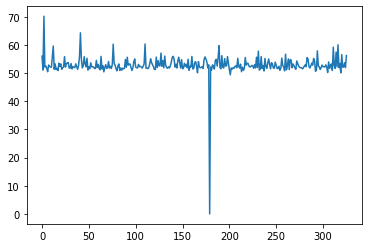

In [18]:
df_promedio.Ping_promedio.plot()

Se verifican los datos que tiene  valor en 0

In [19]:
df_promedio[df_promedio.Ping_promedio==0]

,LA_code,Ping_promedio
179,DateTime,0.0


Se eliminan los datos que tienen valor 0

In [20]:
df_promedio.drop(179, inplace=True)

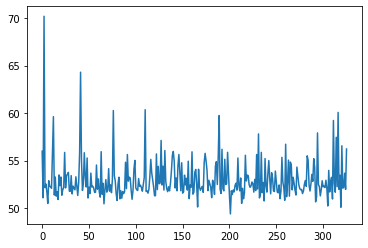

In [21]:
df_promedio.Ping_promedio.plot()

In [23]:
df_promedio.shape

(325, 2)

In [24]:
la_json.shape

(380, 2)